In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user_oldfile = pd.read_csv('data/datatest2.csv',index_col=0)
infomations = pd.read_csv('data/infomations_store.csv',index_col=0)
response = pd.read_csv('data/Form.csv',index_col=0)

In [3]:
user = user_oldfile.iloc[0:,[0,1,2]]

In [4]:
infomations.head(5)

,store,type,address\t,plus_code,latitude,longitude,amenities,menu coffee,menu non coffee,rating,count_rating
0,NAP's Coffee & Roasters,speedbar,"49, 1 ถนน ศรีณรงค์ ตำบลในเมือง อำเภอเมืองอุบลร...",6VH8+F5 เทศบาลนครอุบลราชธานี อำเภอเมืองอุบลราช...,15.228920,104.865365,Toilets,"hazelnut latte,vanilla latte,caramel latte,esp...","Red Plum Sparking,Honey Lemon Sparking,Lychee ...",4.6,178
1,sangob,speedbar,149 ถนน พรหมเทพ ในเมือง เมือง อุบลราชธานี 34000,6VG5+3Q เทศบาลนครอุบลราชธานี อำเภอเมืองอุบลราช...,15.225389,104.859395,"Free Wi-Fi,Toilets","espresso,americano,cappuccino,mocha,latte,cold...","milk caremel,matcha milk,apple tea,peach tea,c...",4.7,57
2,SongSarn,slowbar,ถ.พรหมเทพ ซอย.ข้างร้านรานี ที่มีStreet Art Mue...,6VG5+4C เทศบาลนครอุบลราชธานี อำเภอเมืองอุบลราช...,15.225416,104.858555,Toilets,"espresso,americano,cappuccino,mocha,latte,cold...","cocoa,matcha,peach tea,vanilla ginger,thai tea...",4.6,52
3,LIFE Roasters,"hybrid,bakery",202/3 ถนนสุริยาตร์ ตำบล ในเมือง อำเภอเมืองอุบล...,6VQ6+3F เทศบาลนครอุบลราชธานี อำเภอเมืองอุบลราช...,15.237538,104.861231,Toilets,"sparkling americano,tonic americano,caramel ma...","Iced cocoa,Iced cocoa mint,Iced matcha latte,I...",4.6,255
4,Nap x Warin,speedbar,16 ถนนเทศบาล 9 ตำบล วารินชำราบ อำเภอวารินชำราบ...,5VR6+8Q ตำบล วารินชำราบ อำเภอวารินชำราบ อุบลรา...,15.190857,104.861934,"Free Wi-Fi,Good for kids,Toilets,Bar on site","Espresso Sparkling Yuzu,Lychee Espresso Tonic,...","Matcha Sparkling Yuzu,Yuzu Black Lemon Tea,Cho...",4.5,87


In [6]:
response.head(5)

,Age,Gender,Store,menu,Rating,amenities
Timestamp,,,,,,
1/3/2023 16:52:51,20,male,"NAP's Coffee & Roasters, sangob, Nap x Warin, ...",espresso,4,"Free Wi-Fi, Bar on site"
1/3/2023 16:59:44,16,female,"BalconyKiss Coffee, ROOF COFFEE, LAVA JAVA Co...",latte,4,"Toilets, Free Wi-Fi, Good for kid"
1/3/2023 17:00:34,22,male,"NAP's Coffee & Roasters, SongSarn, Yuanjai Cafe",americano,5,"Free Wi-Fi, High chairs, Bar on site"
1/3/2023 17:00:50,21,female,"NAP's Coffee & Roasters, Nap x Warin, Snoopcat...",latte,5,"Toilets, Free Wi-Fi"
1/3/2023 17:01:45,19,male,"NAP's Coffee & Roasters, sangob, Nap x Warin, ...",cappuccino,4,"Free Wi-Fi, Good for kid, Bar on site"


In [6]:
user.head(10)

,Store,User,Rating
0,NAP's Coffee & Roasters,Nuunet D.,5.0
1,NAP's Coffee & Roasters,vanai sun,3.0
2,NAP's Coffee & Roasters,Phonanan Seeon,5.0
3,NAP's Coffee & Roasters,Chavakorn Laophetsakunchai,5.0
4,NAP's Coffee & Roasters,community man,5.0
5,NAP's Coffee & Roasters,Oaddybeing B,5.0
6,NAP's Coffee & Roasters,Jarunya Buntherng,5.0
7,NAP's Coffee & Roasters,fifi joo,4.0
8,NAP's Coffee & Roasters,YUWADEE WANGSANKLANG,4.0
9,NAP's Coffee & Roasters,FatAmmy' DN,5.0


# visualization

`find different data to learn recommendations with more method`

<AxesSubplot: ylabel='Rating'>

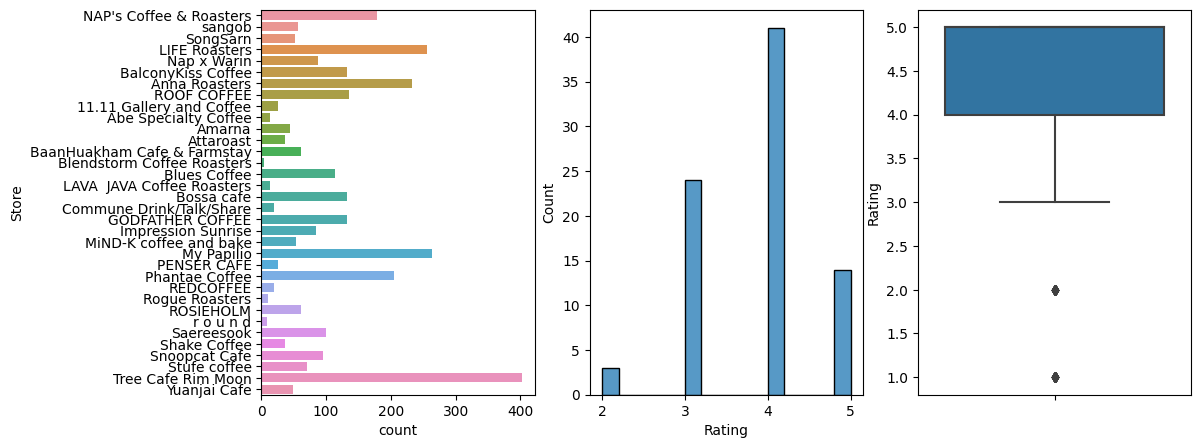

In [28]:
fig, axes = plt.subplots(1, 3,figsize=(12,5))
sns.histplot(data=response, x="Rating",bins=15,ax=axes[1])
sns.countplot(data=user, y="Store",ax=axes[0])
sns.boxplot(y=user['Rating'])

`find outlier`

In [45]:
user[user['Rating'] <= 2].groupby(['Store']).agg(['mean', 'count'])

C:\Users\Note\AppData\Local\Temp\ipykernel_24028\2482397105.py:1: FutureWarning: ['User'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  user[user['Rating'] <= 2].groupby(['Store']).agg(['mean', 'count'])


Rating      
                                 mean count
Store                                      
Anna Roasters                1.400000     5
BaanHuakham Cafe & Farmstay  1.000000     1
BalconyKiss Coffee           2.000000     2
Blues Coffee                 1.333333     9
Bossa cafe                   1.500000     6
Commune Drink/Talk/Share     1.000000     1
GODFATHER COFFEE             1.000000     2
Impression Sunrise           1.666667     3
LIFE Roasters                1.750000     4
My Papilio                   1.500000     4
NAP's Coffee & Roasters      1.500000     2
Nap x Warin                  1.000000     2
PENSER CAFE                  2.000000     1
Phantae Coffee               1.500000     8
ROOF COFFEE                  1.000000     1
Saereesook                   1.333333     3
Snoopcat Cafe                2.000000     1
Stufe coffee                 2.000000     1
Tree Cafe Rim Moon           1.357143    14

`find dupicate review`

In [72]:
check = user.groupby(user.User.tolist(),as_index=False).size()
check

,index,size
0,01 มติมนต์ จํานงค์,1
1,113_kammika raksa,1
2,1904x,1
3,1984whatthehell,2
4,212ปาณิตตา ศิริชัย,1
...,...,...
2259,ไชยพนิตนันท์ ไกรวิเศษ,2
2260,ไชโย กินรี,1
2261,ไทยม๊อตโตะ,1
2262,ไพจิต ศิลารักษ์,1


In [56]:
check

,index,size
0,01 มติมนต์ จํานงค์,1
1,113_kammika raksa,1
2,1904x,1
3,1984whatthehell,2
4,212ปาณิตตา ศิริชัย,1
...,...,...
2259,ไชยพนิตนันท์ ไกรวิเศษ,2
2260,ไชโย กินรี,1
2261,ไทยม๊อตโตะ,1
2262,ไพจิต ศิลารักษ์,1


# try recommendations with matrix svds


ref
`https://medium.com/@aliozan_memetoglu/5-dealing-with-sparsity-and-matrix-factorization-2df425bc2fae`

In [179]:
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix

In [180]:
user_item = user.pivot_table(values='Rating', index='User', columns='Store')

In [181]:
user_item

Store,11.11 Gallery and Coffee,Abe Specialty Coffee,Amarna,Anna Roasters,Attaroast,BaanHuakham Cafe & Farmstay,BalconyKiss Coffee,Blendstorm Coffee Roasters,Blues Coffee,Bossa cafe,...,Rogue Roasters,Saereesook,Shake Coffee,Snoopcat Cafe,SongSarn,Stufe coffee,Tree Cafe Rim Moon,Yuanjai Cafe,r o u n d,sangob
User,,,,,,,,,,,,,,,,,,,,,
01 มติมนต์ จํานงค์,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
113_kammika raksa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904x,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984whatthehell,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212ปาณิตตา ศิริชัย,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ไชยพนิตนันท์ ไกรวิเศษ,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ไชโย กินรี,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ไทยม๊อตโตะ,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
user_item = user_item.astype(float)

In [191]:
user_item = user_item.fillna(0)

In [183]:
# Get the average rating for each user 
avg_ratings = user_item.mean(axis=1)
# Center each users ratings around 0
user_ratings_table_centered = user_item.sub(avg_ratings, axis=0)
# Fill in the missing data with 0s
user_ratings_table_normed = user_ratings_table_centered.fillna(0)

In [184]:
user_ratings_table_normed

Store,11.11 Gallery and Coffee,Abe Specialty Coffee,Amarna,Anna Roasters,Attaroast,BaanHuakham Cafe & Farmstay,BalconyKiss Coffee,Blendstorm Coffee Roasters,Blues Coffee,Bossa cafe,...,Rogue Roasters,Saereesook,Shake Coffee,Snoopcat Cafe,SongSarn,Stufe coffee,Tree Cafe Rim Moon,Yuanjai Cafe,r o u n d,sangob
User,,,,,,,,,,,,,,,,,,,,,
01 มติมนต์ จํานงค์,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113_kammika raksa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1904x,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984whatthehell,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212ปาณิตตา ศิริชัย,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ไชยพนิตนันท์ ไกรวิเศษ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ไชโย กินรี,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ไทยม๊อตโตะ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [192]:
matrix = csr_matrix(user_item)

In [193]:
from scipy.sparse.linalg import svds

U, sigma, Vt = svds(matrix)

In [194]:
# Convert sigma into a diagonal matrix
sigma = np.diag(sigma)
print(sigma)

[[60.90863996  0.          0.          0.          0.          0.        ]
 [ 0.         61.77898698  0.          0.          0.          0.        ]
 [ 0.          0.         66.4517305   0.          0.          0.        ]
 [ 0.          0.          0.         70.74657236  0.          0.        ]
 [ 0.          0.          0.          0.         79.98701331  0.        ]
 [ 0.          0.          0.          0.          0.         93.93942365]]


In [195]:
# Dot product of U and sigma
U_sigma = np.dot(U, sigma)
# Dot product of result and Vt
U_sigma_Vt = np.dot(U_sigma, Vt)
# Add back on the row means contained in avg_ratings
uncentered_ratings = U_sigma_Vt + avg_ratings.values.reshape(-1, 1)
# Create DataFrame of the results
calc_pred_ratings_df = pd.DataFrame(uncentered_ratings, 
                                    index=user_item.index,
                                    columns=user_item.columns
                                   )
# Print both the recalculated matrix and the original 
print(calc_pred_ratings_df)

Store                  11.11 Gallery and Coffee  Abe Specialty Coffee  \
User                                                                    
01 มติมนต์ จํานงค์                     4.994718              4.978859   
113_kammika raksa                      5.096791              5.059491   
1904x                                  5.022823              5.013050   
1984whatthehell                        5.159643              5.043252   
212ปาณิตตา ศิริชัย                     5.026594              5.014942   
...                                         ...                   ...   
ไชยพนิตนันท์ ไกรวิเศษ                  5.113120              5.035564   
ไชโย กินรี                             5.028355              5.016769   
ไทยม๊อตโตะ                             5.039210              4.994560   
ไพจิต ศิลารักษ์                        5.000713              4.976927   
ไวไว อิอิ                              5.062265              5.032459   

Store                    Amarna  Anna Roasters  At

In [202]:
calc_pred_ratings_df

Store,11.11 Gallery and Coffee,Abe Specialty Coffee,Amarna,Anna Roasters,Attaroast,BaanHuakham Cafe & Farmstay,BalconyKiss Coffee,Blendstorm Coffee Roasters,Blues Coffee,Bossa cafe,...,Rogue Roasters,Saereesook,Shake Coffee,Snoopcat Cafe,SongSarn,Stufe coffee,Tree Cafe Rim Moon,Yuanjai Cafe,r o u n d,sangob
User,,,,,,,,,,,,,,,,,,,,,
01 มติมนต์ จํานงค์,4.994718,4.978859,5.029515,4.941826,5.035267,5.009044,5.205528,4.990526,5.129754,5.210149,...,4.988547,5.036474,4.994518,5.099110,4.996969,5.083510,9.940879,4.975352,5.002767,5.091985
113_kammika raksa,5.096791,5.059491,5.189569,4.955046,5.119196,5.126198,4.992057,5.016578,5.120877,5.121775,...,5.023942,5.334699,5.014830,5.220090,5.168070,5.067142,5.200632,5.075588,5.018292,5.209978
1904x,5.022823,5.013050,5.042906,5.039210,5.026594,5.028355,5.016909,5.004798,5.029929,5.027909,...,5.006094,5.073910,5.006172,5.041782,5.034897,5.015142,4.994718,5.019103,5.004615,5.041790
1984whatthehell,5.159643,5.043252,5.363655,9.682746,5.244128,5.185338,5.746033,5.078910,5.237183,5.231069,...,5.053837,5.619502,5.146210,5.034217,5.110667,5.102144,4.892267,5.207300,5.050509,5.097766
212ปาณิตตา ศิริชัย,5.026594,5.014942,5.057028,5.172443,5.036334,5.034463,5.016249,5.006127,5.032784,5.033209,...,5.006799,5.100973,5.006847,5.055461,5.042658,5.018941,5.035267,5.023235,5.005606,5.052649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ไชยพนิตนันท์ ไกรวิเศษ,5.113120,5.035564,5.415165,10.312117,5.273416,5.139706,5.355152,5.052644,5.168218,5.141693,...,5.023306,5.810313,5.072969,5.290520,5.196155,5.116849,4.978300,5.138360,5.031294,5.209545
ไชโย กินรี,5.028355,5.016769,5.054253,5.047124,5.034463,5.037203,5.009079,5.006091,5.031739,5.033989,...,5.007755,5.092582,5.006529,5.052835,5.042924,5.017704,5.009044,5.024348,5.005911,5.053845
ไทยม๊อตโตะ,5.039210,4.994560,5.254600,9.792099,5.172443,5.047124,5.301722,5.036133,5.068233,5.050327,...,5.005189,5.520018,5.053058,5.129308,5.071400,5.062136,4.941826,5.075211,5.016316,5.061475


# try cosine with NerestNeighbors
ref
`https://www.kaggle.com/code/ecemboluk/recommendation-system-with-cf-using-knn`

In [211]:
from scipy.sparse.linalg import svds
import pandas as pd

In [204]:
test1 = user_item.fillna(0)

In [171]:
ma = csr_matrix(test1.values)

In [212]:
from sklearn.neighbors import NearestNeighbors

In [175]:
model = NearestNeighbors(metric= 'cosine',algorithm = 'brute',n_neighbors = 20)

In [176]:
model.fit(ma)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [205]:
aa = test1.T ## trans

In [206]:
query_index = np.random.choice(aa.shape[0])

In [207]:
print("Choosen Movie is: ",aa.index[query_index])

Choosen Movie is:  Yuanjai Cafe


In [213]:
user_movie_table_matrix = csr_matrix(aa.values)
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(user_movie_table_matrix)
distances, indices = model_knn.kneighbors(aa.iloc[query_index,:].values.reshape(1,-1), n_neighbors = 7)

In [214]:
aa.iloc[query_index,:].values.reshape(1,-1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [215]:
movie = []
distance = []

for i in range(0, len(distances.flatten())):
    if i != 0:
        movie.append(aa.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])    

m=pd.Series(movie,name='movie')

d=pd.Series(distance,name='distance')
recommend = pd.concat([m,d], axis=1)
recommend = recommend.sort_values('distance',ascending=False)

print('Recommendations for {0}:\n'.format(aa.index[query_index]))
for i in range(0,recommend.shape[0]):
    print('{0}: {1}, with distance of {2}'.format(i, recommend["movie"].iloc[i], recommend["distance"].iloc[i]))

Recommendations for Yuanjai Cafe:

0: LIFE Roasters, with distance of 0.9351326519258529
1: Nap x Warin, with distance of 0.9291327218051174
2: Amarna, with distance of 0.9117415530750803
3: Saereesook, with distance of 0.8818980475761952
4: Rogue Roasters, with distance of 0.8580906793500882
5: Blendstorm Coffee Roasters, with distance of 0.8459003509187458


In [7]:
response

,Age,Gender,Store,menu,Rating,amenities
Timestamp,,,,,,
1/3/2023 16:52:51,20,male,"NAP's Coffee & Roasters, sangob, Nap x Warin, ...",espresso,4,"Free Wi-Fi, Bar on site"
1/3/2023 16:59:44,16,female,"BalconyKiss Coffee, ROOF COFFEE, LAVA JAVA Co...",latte,4,"Toilets, Free Wi-Fi, Good for kid"
1/3/2023 17:00:34,22,male,"NAP's Coffee & Roasters, SongSarn, Yuanjai Cafe",americano,5,"Free Wi-Fi, High chairs, Bar on site"
1/3/2023 17:00:50,21,female,"NAP's Coffee & Roasters, Nap x Warin, Snoopcat...",latte,5,"Toilets, Free Wi-Fi"
1/3/2023 17:01:45,19,male,"NAP's Coffee & Roasters, sangob, Nap x Warin, ...",cappuccino,4,"Free Wi-Fi, Good for kid, Bar on site"
...,...,...,...,...,...,...
1/3/2023 22:19:01,19,female,"NAP's Coffee & Roasters, Nap x Warin",latte,3,Bar on site
1/3/2023 22:19:46,21,female,"NAP's Coffee & Roasters, sangob, SongSarn, LIF...",espresso,4,"Free Wi-Fi, Bar on site"
1/3/2023 22:21:04,28,female,"Nap x Warin, ROOF COFFEE, 11.11 Gallery and Co...",mocha,2,Toilets


In [11]:
def change(x):
    return x.split(',')

In [12]:
response.head(2)

,Age,Gender,Store,menu,Rating,amenities
Timestamp,,,,,,
1/3/2023 16:52:51,20,male,"NAP's Coffee & Roasters, sangob, Nap x Warin, ...",espresso,4,"Free Wi-Fi, Bar on site"
1/3/2023 16:59:44,16,female,"BalconyKiss Coffee, ROOF COFFEE, LAVA JAVA Co...",latte,4,"Toilets, Free Wi-Fi, Good for kid"


In [237]:
test = response.copy()

In [238]:
test['Store'] = test['Store'].apply(change)
test['amenities'] = test['amenities'].apply(change)
test = test.reset_index()

In [239]:
test

,Timestamp,Age,Gender,Store,menu,Rating,amenities
0,1/3/2023 16:52:51,20,male,"[NAP's Coffee & Roasters, sangob, Nap x Wari...",espresso,4,"[Free Wi-Fi, Bar on site]"
1,1/3/2023 16:59:44,16,female,"[BalconyKiss Coffee, ROOF COFFEE, LAVA JAVA...",latte,4,"[Toilets, Free Wi-Fi, Good for kid]"
2,1/3/2023 17:00:34,22,male,"[NAP's Coffee & Roasters, SongSarn, Yuanjai ...",americano,5,"[Free Wi-Fi, High chairs, Bar on site]"
3,1/3/2023 17:00:50,21,female,"[NAP's Coffee & Roasters, Nap x Warin, Snoop...",latte,5,"[Toilets, Free Wi-Fi]"
4,1/3/2023 17:01:45,19,male,"[NAP's Coffee & Roasters, sangob, Nap x Wari...",cappuccino,4,"[Free Wi-Fi, Good for kid, Bar on site]"
...,...,...,...,...,...,...,...
77,1/3/2023 22:19:01,19,female,"[NAP's Coffee & Roasters, Nap x Warin]",latte,3,[Bar on site]
78,1/3/2023 22:19:46,21,female,"[NAP's Coffee & Roasters, sangob, SongSarn, ...",espresso,4,"[Free Wi-Fi, Bar on site]"
79,1/3/2023 22:21:04,28,female,"[Nap x Warin, ROOF COFFEE, 11.11 Gallery and...",mocha,2,[Toilets]
80,1/3/2023 22:24:26,42,female,"[Nap x Warin, ROOF COFFEE, 11.11 Gallery and...",cappuccino,4,"[Free Wi-Fi, Bar on site]"


In [240]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)

df = test.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(test.pop('Store')),
                index=test.index,
                columns=mlb.classes_))
# df = test.join(
#             pd.DataFrame.sparse.from_spmatrix(
#                 mlb.fit_transform(test.pop('amenities')),
#                 index=test.index,
#                 columns=mlb.classes_))

In [241]:
df1 = df.drop('Timestamp',axis=1)

In [242]:
df1['user'] = np.arange(len(test2))

In [125]:
test2 = response.copy().reset_index()
test2 = test2.drop('Timestamp',axis=1)

In [126]:
test2['Store'] = test2['Store'].apply(change)
test2['amenities'] = test2['amenities'].apply(change)

In [127]:
test2['user'] = np.arange(len(test2))

In [ ]:
import numpy as np
from scipy.sparse.linalg import svds

# Load the data
data = pd.read_csv("user_item_data.csv")

# Create a pivot table of user-item interactions
pivot = user.pivot_table(values='liked', index='user_id', columns='item_id')

# Fill in missing values with 0
pivot = pivot.fillna(0)

# Convert the pivot table to a sparse matrix
sparse_matrix = sparse.csr_matrix(pivot.values)

# Perform matrix factorization
U, sigma, Vt = svds(sparse_matrix, k=10)

# Create the user-latent feature and item-latent feature matrices
user_latent_features = U
item_latent_features = Vt.T

# Create a function to return the top n recommended items to a given user
def get_recommendations(user_id, latent_features=item_latent_features):
    # Get the user's latent feature vector
    user_vec = latent_features[user_id]

    # Calculate the dot product between the user's latent feature vector and all item latent feature vectors
    scores = np.dot(latent_features, user_vec)

    # Sort the items based on the scores
    item_indexes = np.argsort(scores)[::-1]

    # Return the top n recommended items
    return pivot.columns[item_indexes][:n]

In [72]:
user_item

Store,11.11 Gallery and Coffee,Abe Specialty Coffee,Amarna,Anna Roasters,Attaroast,BaanHuakham Cafe & Farmstay,BalconyKiss Coffee,Blendstorm Coffee Roasters,Blues Coffee,Bossa cafe,...,Rogue Roasters,Saereesook,Shake Coffee,Snoopcat Cafe,SongSarn,Stufe coffee,Tree Cafe Rim Moon,Yuanjai Cafe,r o u n d,sangob
User,,,,,,,,,,,,,,,,,,,,,
01 มติมนต์ จํานงค์,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
113_kammika raksa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1904x,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984whatthehell,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212ปาณิตตา ศิริชัย,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ไชยพนิตนันท์ ไกรวิเศษ,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ไชโย กินรี,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ไทยม๊อตโตะ,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Create a pivot table to get the rating data in a matrix format
pivot_table = user.pivot_table(values='Rating', index='User', columns='Store')

# Fill any missing values with 0
pivot_table.fillna(0, inplace=True)

# Compute the cosine similarity between all users
user_similarity = cosine_similarity(pivot_table)

def recommend_stores(user_id, pivot_table, user_similarity):
    # Get the index of the user in the pivot table
    user_index = pivot_table.index.get_loc(user_id)
    
    # Get the similarity scores of all other users
    similar_users = user_similarity[user_index]
    
    # Create a DataFrame with the similarity scores and the store ratings
    similar_users = pd.DataFrame(similar_users, columns=['similarity'], index=pivot_table.index)
    similar_users = similar_users.join(pivot_table, how='inner')
    
    # Multiply the similarity score by the rating for each store and sum them up
    store_scores = similar_users.apply(lambda x: x['similarity'] * x[pivot_table.columns], axis=1)
    store_scores = store_scores.sum()

    # sort the store by the store_scores
    store_scores = store_scores.sort_values(ascending=False)
    
    # Return the top 10 stores
    return store_scores.head(10)


# Example usage: recommend stores for user with ID 42
print(recommend_stores('1904x', pivot_table, user_similarity))

Store
11.11 Gallery and Coffee       79.657398
LIFE Roasters                  15.180039
Amarna                         13.328938
NAP's Coffee & Roasters        10.906651
Attaroast                      10.630046
MiND-K coffee and bake         10.186160
Saereesook                      9.268876
Nap x Warin                     7.008895
BaanHuakham Cafe & Farmstay     6.711824
Anna Roasters                   6.523003
dtype: float64


In [128]:
test2.head(2)

,Age,Gender,Store,menu,Rating,amenities,user
0,20,male,"[NAP's Coffee & Roasters, sangob, Nap x Wari...",espresso,4,"[Free Wi-Fi, Bar on site]",0
1,16,female,"[BalconyKiss Coffee, ROOF COFFEE, LAVA JAVA...",latte,4,"[Toilets, Free Wi-Fi, Good for kid]",1


In [146]:
data = test2

# Create a dictionary to store the age and gender of each user
user_features = {
    user_id: {'Age': age, 'Gender': gender} for user_id, age, gender in data[['user', 'Age', 'Gender']].values
}

# Create a dictionary to store the likes of each user
user_likes = {
    user_id: set(stores) for user_id,stores in data[['user','Store']].values
}
# Define a function to recommend stores for a new user
def recommend_stores(user_id, user_features, user_likes, num_recs=10):
    # Get the age and gender of the new user
    age = user_features[user_id]['Age']
    gender = user_features[user_id]['Gender']
    
    # Get the stores that the new user likes
    liked_stores = user_likes[user_id]
    
    # Get the stores that have been liked by other users of the same age and gender as the new user
    similar_stores = set()
    for user, features in user_features.items():
        if user != user_id and features['Age'] == age and features['Gender'] == gender:
            similar_stores.update(user_likes[user])
    
    # Remove the stores that the new user has already liked
    similar_stores -= liked_stores
    
    # Return the top num_recs stores
    return list(similar_stores)[:num_recs]

# Example usage: recommend stores for user with ID 42
print(recommend_stores(81, user_features, user_likes))

[' REDCOFFEE', ' r o u n d', ' My Papilio', ' MiND-K coffee and bake', 'LAVA  JAVA Coffee Roasters']


# Apriori

In [217]:
pip install mlxtend


     ---------------------------------------- 1.3/1.3 MB 7.8 MB/s eta 0:00:00


In [263]:
aaaa = df1.drop(['amenities','Rating','menu','Gender','Age'],axis=1)
asd = aaaa.columns.values.tolist()
ss = pd.pivot_table(aaaa, index=['user'], values=asd[:-1])

In [375]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [376]:
ss.head()

,11.11 Gallery and Coffee,Abe Specialty Coffee,Amarna,Anna Roasters,Attaroast,BaanHuakham Cafe & Farmstay,BalconyKiss Coffee,Blendstorm Coffee Roasters,Bossa cafe,Commune Drink/Talk/Share,...,BalconyKiss Coffee,Impression Sunrise,LAVA JAVA Coffee Roasters,LIFE Roasters,MiND-K coffee and bake,NAP's Coffee & Roasters,Nap x Warin,ROOF COFFEE,SongSarn,sangob
user,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [403]:
frequent_itemset = apriori(ss, min_support=0.05, use_colnames=True)

C:\Users\Note\miniconda3\envs\recommendations\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [404]:
frequent_itemset.head()

,support,itemsets
0,0.097561,( 11.11 Gallery and Coffee)
1,0.097561,( Abe Specialty Coffee)
2,0.231707,( Amarna)
3,0.097561,( Anna Roasters)
4,0.134146,( Attaroast)


In [405]:
rules = association_rules(frequent_itemset, metric="lift", min_threshold=0.3)

In [406]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( Amarna),( Anna Roasters),0.231707,0.097561,0.060976,0.263158,2.697368,0.038370,1.224739
1,( Anna Roasters),( Amarna),0.097561,0.231707,0.060976,0.625000,2.697368,0.038370,2.048780
2,( Amarna),( Bossa cafe),0.231707,0.170732,0.060976,0.263158,1.541353,0.021416,1.125436
3,( Bossa cafe),( Amarna),0.170732,0.231707,0.060976,0.357143,1.541353,0.021416,1.195122
4,( Amarna),( REDCOFFEE),0.231707,0.158537,0.060976,0.263158,1.659919,0.024242,1.141986


In [407]:
df_res = rules.sort_values(by=['lift'], ascending=False)
df_res.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
97,"( Nap x Warin, sangob)","(NAP's Coffee & Roasters, Saereesook)",0.085366,0.073171,0.060976,0.714286,9.761905,0.054729,3.243902
92,"(NAP's Coffee & Roasters, Saereesook)","( Nap x Warin, sangob)",0.073171,0.085366,0.060976,0.833333,9.761905,0.054729,5.487805
89,"(NAP's Coffee & Roasters, sangob, Saereesook)",( Nap x Warin),0.060976,0.134146,0.060976,1.000000,7.454545,0.052796,inf
100,( Nap x Warin),"(NAP's Coffee & Roasters, sangob, Saereesook)",0.134146,0.060976,0.060976,0.454545,7.454545,0.052796,1.721545
53,"( sangob, Saereesook)",( Nap x Warin),0.060976,0.134146,0.060976,1.000000,7.454545,0.052796,inf


In [16]:
tran = response.reset_index()

In [18]:
tran.drop('Timestamp',axis=1)

,Age,Gender,Store,menu,Rating,amenities
0,20,male,"NAP's Coffee & Roasters, sangob, Nap x Warin, ...",espresso,4,"Free Wi-Fi, Bar on site"
1,16,female,"BalconyKiss Coffee, ROOF COFFEE, LAVA JAVA Co...",latte,4,"Toilets, Free Wi-Fi, Good for kid"
2,22,male,"NAP's Coffee & Roasters, SongSarn, Yuanjai Cafe",americano,5,"Free Wi-Fi, High chairs, Bar on site"
3,21,female,"NAP's Coffee & Roasters, Nap x Warin, Snoopcat...",latte,5,"Toilets, Free Wi-Fi"
4,19,male,"NAP's Coffee & Roasters, sangob, Nap x Warin, ...",cappuccino,4,"Free Wi-Fi, Good for kid, Bar on site"
...,...,...,...,...,...,...
77,19,female,"NAP's Coffee & Roasters, Nap x Warin",latte,3,Bar on site
78,21,female,"NAP's Coffee & Roasters, sangob, SongSarn, LIF...",espresso,4,"Free Wi-Fi, Bar on site"
79,28,female,"Nap x Warin, ROOF COFFEE, 11.11 Gallery and Co...",mocha,2,Toilets
80,42,female,"Nap x Warin, ROOF COFFEE, 11.11 Gallery and Co...",cappuccino,4,"Free Wi-Fi, Bar on site"


# Visualizations

In [19]:
sns.barplot(x='A', y='B', data=df_2);

AttributeError: module 'seaborn' has no attribute 'bar'

<AxesSubplot: xlabel='Gender', ylabel='count'>

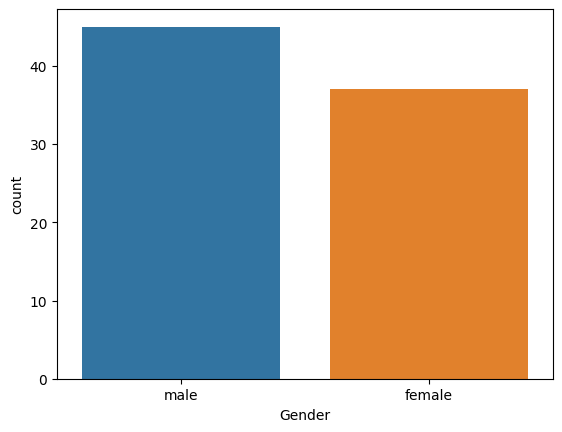

In [37]:
sns.countplot(x='Gender', data=tran,)

In [39]:
infomations

,store,type,address\t,plus_code,latitude,longitude,amenities,menu coffee,menu non coffee,rating,count_rating
0,NAP's Coffee & Roasters,speedbar,"49, 1 ถนน ศรีณรงค์ ตำบลในเมือง อำเภอเมืองอุบลร...",6VH8+F5 เทศบาลนครอุบลราชธานี อำเภอเมืองอุบลราช...,15.228920,104.865365,Toilets,"hazelnut latte,vanilla latte,caramel latte,esp...","Red Plum Sparking,Honey Lemon Sparking,Lychee ...",4.6,178
1,sangob,speedbar,149 ถนน พรหมเทพ ในเมือง เมือง อุบลราชธานี 34000,6VG5+3Q เทศบาลนครอุบลราชธานี อำเภอเมืองอุบลราช...,15.225389,104.859395,"Free Wi-Fi,Toilets","espresso,americano,cappuccino,mocha,latte,cold...","milk caremel,matcha milk,apple tea,peach tea,c...",4.7,57
2,SongSarn,slowbar,ถ.พรหมเทพ ซอย.ข้างร้านรานี ที่มีStreet Art Mue...,6VG5+4C เทศบาลนครอุบลราชธานี อำเภอเมืองอุบลราช...,15.225416,104.858555,Toilets,"espresso,americano,cappuccino,mocha,latte,cold...","cocoa,matcha,peach tea,vanilla ginger,thai tea...",4.6,52
3,LIFE Roasters,"hybrid,bakery",202/3 ถนนสุริยาตร์ ตำบล ในเมือง อำเภอเมืองอุบล...,6VQ6+3F เทศบาลนครอุบลราชธานี อำเภอเมืองอุบลราช...,15.237538,104.861231,Toilets,"sparkling americano,tonic americano,caramel ma...","Iced cocoa,Iced cocoa mint,Iced matcha latte,I...",4.6,255
4,Nap x Warin,speedbar,16 ถนนเทศบาล 9 ตำบล วารินชำราบ อำเภอวารินชำราบ...,5VR6+8Q ตำบล วารินชำราบ อำเภอวารินชำราบ อุบลรา...,15.190857,104.861934,"Free Wi-Fi,Good for kids,Toilets,Bar on site","Espresso Sparkling Yuzu,Lychee Espresso Tonic,...","Matcha Sparkling Yuzu,Yuzu Black Lemon Tea,Cho...",4.5,87
5,BalconyKiss Coffee,speedbar,141 ถนน พิชิตรังสรรค์ ตำบล ในเมือง อำเภอเมืองอ...,6VM6+4V เทศบาลนครอุบลราชธานี อำเภอเมืองอุบลราช...,15.232943,104.862160,"Toilets,Good for kids","espresso,americano,cappuccino,mocha,latte,long...","mixed berry smoothie,strawberry smoothie,blueb...",4.5,133
6,Anna Roasters,"speedbar,bakery",85/7 ถนน พิชิตรังสรรค์ ตำบล ในเมือง อำเภอเมือง...,6VM8+89 เทศบาลนครอุบลราชธานี อำเภอเมืองอุบลราช...,15.233293,104.865939,"Free Wi-Fi,Good for kids,Toilets,Bar on site,G...","espresso,americano,cappuccino,mocha,latte,macc...","cocoa,matcha,peach tea,thai tea,green tea,appl...",4.6,233
7,ROOF COFFEE,"speedbar,bakery",136 ถนน ราชบุตร ตำบล ในเมือง อำเภอเมืองอุบลราช...,6VG5+VJ เทศบาลนครอุบลราชธานี อำเภอเมืองอุบลราช...,15.227155,104.859081,"Free Wi-Fi,Toilets","espresso,americano,cappuccino,mocha,latte,macc...","matcha,peach tea,thai tea,green tea,apple tea,...",4.5,135
8,11.11 Gallery and Coffee,"hybrid,bakery",116/5 ถนน พโลรังฤทธิ์ ตำบล ในเมือง อำเภอ เมือง...,6VJ8+9H เทศบาลนครอุบลราชธานี อำเภอเมืองอุบลราช...,15.231022,104.866439,"Free Wi-Fi,Toilets","espresso,americano,cappuccino,mocha,latte,cold...","cocoa,matcha,peach tea,thai tea,lemon tea,jasm...",4.7,26
9,Abe Specialty Coffee,slowbar,174 ในเมือง เมือง อุบลราชธานี 34000,6VJ4+V8 เทศบาลนครอุบลราชธานี อำเภอเมืองอุบลราช...,15.232137,104.855851,"Free Wi-Fi,Good for kids,Toilets","espresso,americano,cappuccino,mocha,latte,macc...","cocoa,thai tea,green tea,punch soda,blue hawai...",4.8,14


In [40]:
def setlist(x):
    aa = x.split(',')
    return aa

## mongodb set up

In [42]:
infomations['type'] = infomations['type'].apply(setlist)

In [44]:
infomations['amenities'] = infomations['amenities'].apply(setlist)

In [48]:
infomations.to_json('infomations_fixed.json')

In [49]:
import csv

In [54]:
from pymongo import MongoClient 

ModuleNotFoundError: No module named 'pymongo'

In [67]:
from pymongo import MongoClient 
import io

In [57]:
client = MongoClient('localhost', 27017)

In [58]:
db = client['Infomations']

In [70]:
new_collection = db.new_collection
with open('data/infomations_store.csv', encoding="utf-8-sig") as csvfile:
    # Read the CSV file
    reader = csv.DictReader(csvfile)
    # Iterate through each row
    for row in reader:
        # Split string to array
        print(row)
        row['type'] = row['type'].split(',')
        row['rating'] = float(row['rating'])
        row['latitude'] = float(row['latitude'])
        row['longitude'] = float(row['longitude'])
        row['count_rating'] = float(row['count_rating'])
        # Insert the row into the collection
        print(row)
        new_collection.insert_one(row)

{'': '0', 'store': "NAP's Coffee & Roasters", 'type': 'speedbar', 'address\t': '49, 1 ถนน ศรีณรงค์ ตำบลในเมือง อำเภอเมืองอุบลราชธานี อุบลราชธานี 34000', 'plus_code': '6VH8+F5 เทศบาลนครอุบลราชธานี อำเภอเมืองอุบลราชธานี อุบลราชธานี', 'latitude': '15.22891997', 'longitude': '104.8653647', 'amenities': 'Toilets', 'menu coffee': 'hazelnut latte,vanilla latte,caramel latte,espresso,americano,cappuccino,mocha,latte', 'menu non coffee': 'Red Plum Sparking,Honey Lemon Sparking,Lychee Sparking,Mint Lime Sparking,Vanilla Milk,Hazelnut Milk,Caramel Milk,Peach Tea,Apple tea,Taro Latte,Thai tea,Lemon tea,matcha,cocoa', 'rating': '4.6', 'count_rating': '178'}
{'': '0', 'store': "NAP's Coffee & Roasters", 'type': ['speedbar'], 'address\t': '49, 1 ถนน ศรีณรงค์ ตำบลในเมือง อำเภอเมืองอุบลราชธานี อุบลราชธานี 34000', 'plus_code': '6VH8+F5 เทศบาลนครอุบลราชธานี อำเภอเมืองอุบลราชธานี อุบลราชธานี', 'latitude': 15.22891997, 'longitude': 104.8653647, 'amenities': 'Toilets', 'menu coffee': 'hazelnut latte,vanilla

# Apiori group

In [71]:
respone

NameError: name 'respone' is not defined

In [72]:
response

,Age,Gender,Store,menu,Rating,amenities
Timestamp,,,,,,
1/3/2023 16:52:51,20,male,"NAP's Coffee & Roasters, sangob, Nap x Warin, ...",espresso,4,"Free Wi-Fi, Bar on site"
1/3/2023 16:59:44,16,female,"BalconyKiss Coffee, ROOF COFFEE, LAVA JAVA Co...",latte,4,"Toilets, Free Wi-Fi, Good for kid"
1/3/2023 17:00:34,22,male,"NAP's Coffee & Roasters, SongSarn, Yuanjai Cafe",americano,5,"Free Wi-Fi, High chairs, Bar on site"
1/3/2023 17:00:50,21,female,"NAP's Coffee & Roasters, Nap x Warin, Snoopcat...",latte,5,"Toilets, Free Wi-Fi"
1/3/2023 17:01:45,19,male,"NAP's Coffee & Roasters, sangob, Nap x Warin, ...",cappuccino,4,"Free Wi-Fi, Good for kid, Bar on site"
...,...,...,...,...,...,...
1/3/2023 22:19:01,19,female,"NAP's Coffee & Roasters, Nap x Warin",latte,3,Bar on site
1/3/2023 22:19:46,21,female,"NAP's Coffee & Roasters, sangob, SongSarn, LIF...",espresso,4,"Free Wi-Fi, Bar on site"
1/3/2023 22:21:04,28,female,"Nap x Warin, ROOF COFFEE, 11.11 Gallery and Co...",mocha,2,Toilets


In [175]:
tra = response.reset_index()

In [176]:
tra = tra.drop('Timestamp',axis=1)

In [177]:
tra

,Age,Gender,Store,menu,Rating,amenities
0,20,male,"NAP's Coffee & Roasters, sangob, Nap x Warin, ...",espresso,4,"Free Wi-Fi, Bar on site"
1,16,female,"BalconyKiss Coffee, ROOF COFFEE, LAVA JAVA Co...",latte,4,"Toilets, Free Wi-Fi, Good for kid"
2,22,male,"NAP's Coffee & Roasters, SongSarn, Yuanjai Cafe",americano,5,"Free Wi-Fi, High chairs, Bar on site"
3,21,female,"NAP's Coffee & Roasters, Nap x Warin, Snoopcat...",latte,5,"Toilets, Free Wi-Fi"
4,19,male,"NAP's Coffee & Roasters, sangob, Nap x Warin, ...",cappuccino,4,"Free Wi-Fi, Good for kid, Bar on site"
...,...,...,...,...,...,...
77,19,female,"NAP's Coffee & Roasters, Nap x Warin",latte,3,Bar on site
78,21,female,"NAP's Coffee & Roasters, sangob, SongSarn, LIF...",espresso,4,"Free Wi-Fi, Bar on site"
79,28,female,"Nap x Warin, ROOF COFFEE, 11.11 Gallery and Co...",mocha,2,Toilets
80,42,female,"Nap x Warin, ROOF COFFEE, 11.11 Gallery and Co...",cappuccino,4,"Free Wi-Fi, Bar on site"


In [144]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [348]:
tra = tra.iloc[0:,[0,1,2]]

In [349]:
tra

,Age,Gender,Store
0,20,male,"[NAP's Coffee & Roasters, sangob, Nap x Wari..."
1,16,female,"[BalconyKiss Coffee, ROOF COFFEE, LAVA JAVA..."
2,22,male,"[NAP's Coffee & Roasters, SongSarn, Yuanjai ..."
3,21,female,"[NAP's Coffee & Roasters, Nap x Warin, Snoop..."
4,19,male,"[NAP's Coffee & Roasters, sangob, Nap x Wari..."
...,...,...,...
77,19,female,"[NAP's Coffee & Roasters, Nap x Warin]"
78,21,female,"[NAP's Coffee & Roasters, sangob, SongSarn, ..."
79,28,female,"[Nap x Warin, ROOF COFFEE, 11.11 Gallery and..."
80,42,female,"[Nap x Warin, ROOF COFFEE, 11.11 Gallery and..."


In [136]:
grouped_data = tra.groupby(['Age', 'Gender'])['Store'].apply(list).reset_index()


In [352]:
grouped_data

,Age,Gender,Store
0,16,female,"[BalconyKiss Coffee, ROOF COFFEE, LAVA JAVA C..."
1,17,female,"[NAP's Coffee & Roasters, sangob, Bossa cafe, ..."
2,17,male,"[Anna Roasters, Attaroast, r o u n d, Snoopcat..."
3,18,female,"[ROOF COFFEE, Amarna, Bossa cafe, r o u n d, B..."
4,18,male,"[NAP's Coffee & Roasters, 11.11 Gallery and Co..."
5,19,female,"[NAP's Coffee & Roasters, sangob, Attaroast, B..."
6,19,male,"[NAP's Coffee & Roasters, sangob, Nap x Warin,..."
7,20,female,"[NAP's Coffee & Roasters, LIFE Roasters, Bossa..."
8,20,male,"[NAP's Coffee & Roasters, sangob, Nap x Warin,..."
9,21,female,"[NAP's Coffee & Roasters, Nap x Warin, Snoopca..."


In [150]:
te = TransactionEncoder()
te_ary = te.fit(grouped_data['Store']).transform(grouped_data['Store'])
df12312 = pd.DataFrame(te_ary, columns=te.columns_)

In [353]:
df12312

,"11.11 Gallery and Coffee, Attaroast, Blendstorm Coffee Roasters, MiND-K coffee and bake, My Papilio, r o u n d","11.11 Gallery and Coffee, Blendstorm Coffee Roasters, MiND-K coffee and bake","Abe Specialty Coffee, Amarna, LAVA JAVA Coffee Roasters, Bossa cafe","Amarna, Impression Sunrise, My Papilio","Anna Roasters, Attaroast, r o u n d, Snoopcat Cafe","Anna Roasters, Blendstorm Coffee Roasters, BaanHuakham Cafe & Farmstay, Rogue Roasters, Snoopcat Cafe","Anna Roasters, Impression Sunrise, REDCOFFEE","Anna Roasters, ROOF COFFEE, Amarna, Attaroast, Bossa cafe","BaanHuakham Cafe & Farmstay, Bossa cafe, Tree Cafe Rim Moon","BalconyKiss Coffee, 11.11 Gallery and Coffee, LAVA JAVA Coffee Roasters, MiND-K coffee and bake, My Papilio, r o u n d, Snoopcat Cafe",...,"SongSarn, LIFE Roasters, Rogue Roasters, Saereesook","SongSarn, ROOF COFFEE, Amarna, Phantae Coffee, REDCOFFEE","sangob, Abe Specialty Coffee, Amarna, GODFATHER COFFEE","sangob, Amarna, LAVA JAVA Coffee Roasters","sangob, Anna Roasters, Amarna, Bossa cafe, GODFATHER COFFEE","sangob, BalconyKiss Coffee, Abe Specialty Coffee, Commune Drink/Talk/Share, MiND-K coffee and bake","sangob, Bossa cafe, Commune Drink/Talk/Share, GODFATHER COFFEE, Snoopcat Cafe, Stufe coffee","sangob, SongSarn, 11.11 Gallery and Coffee, REDCOFFEE, ROSIEHOLM","sangob, SongSarn, Abe Specialty Coffee, Yuanjai Cafe","sangob, SongSarn, Blendstorm Coffee Roasters, BaanHuakham Cafe & Farmstay, MiND-K coffee and bake"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [174]:
frequent_itemsets = apriori(df12312, min_support=0.01, use_colnames=True)
#Generate association rules from the frequent item sets
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Implement the recommender system
def recommend(user_age, user_gender):
    recommended_items = set()
    for index, row in rules.iterrows():
        if user_age in row["antecedents"] and user_gender in row["antecedents"]:
            recommended_items.add(row["consequents"])
    return list(recommended_items)

# Test the recommender system
print(recommend(20, "female"))


[]


In [172]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(MiND-K coffee and bake, My Papilio, ROSIEHOLM...","(11.11 Gallery and Coffee, Attaroast, Blendsto...",0.026316,0.026316,0.026316,1.0,38.0,0.025623,inf
1,"(11.11 Gallery and Coffee, Attaroast, Blendsto...","(MiND-K coffee and bake, My Papilio, ROSIEHOLM...",0.026316,0.026316,0.026316,1.0,38.0,0.025623,inf
2,"(11.11 Gallery and Coffee, Blendstorm Coffee R...","(LIFE Roasters, GODFATHER COFFEE, Impression S...",0.026316,0.026316,0.026316,1.0,38.0,0.025623,inf
3,"(LIFE Roasters, GODFATHER COFFEE, Impression S...","(11.11 Gallery and Coffee, Blendstorm Coffee R...",0.026316,0.026316,0.026316,1.0,38.0,0.025623,inf
4,"(11.11 Gallery and Coffee, Blendstorm Coffee R...","(LIFE Roasters, ROOF COFFEE, Abe Specialty Cof...",0.026316,0.026316,0.026316,1.0,38.0,0.025623,inf
...,...,...,...,...,...,...,...,...,...
1135,"(LIFE Roasters, Abe Specialty Coffee, Saereesook)","(sangob, SongSarn, Abe Specialty Coffee, Yuanj...",0.026316,0.026316,0.026316,1.0,38.0,0.025623,inf
1136,"(Amarna, Impression Sunrise, My Papilio)","(LIFE Roasters, Abe Specialty Coffee, Saereeso...",0.026316,0.026316,0.026316,1.0,38.0,0.025623,inf
1137,"(sangob, BalconyKiss Coffee, Abe Specialty Cof...","(LIFE Roasters, Abe Specialty Coffee, Saereeso...",0.026316,0.026316,0.026316,1.0,38.0,0.025623,inf
1138,"(BalconyKiss Coffee, ROOF COFFEE, Bossa cafe)","(LIFE Roasters, Abe Specialty Coffee, Saereeso...",0.026316,0.026316,0.026316,1.0,38.0,0.025623,inf


In [178]:
tra['age_group'] = tra['Age'].apply(lambda x: '15-20' if x <= 20 else '21-40' if x <= 40 else '41-60' if x <= 60 else '60+')

In [179]:
tra

,Age,Gender,Store,menu,Rating,amenities,age_group
0,20,male,"NAP's Coffee & Roasters, sangob, Nap x Warin, ...",espresso,4,"Free Wi-Fi, Bar on site",15-20
1,16,female,"BalconyKiss Coffee, ROOF COFFEE, LAVA JAVA Co...",latte,4,"Toilets, Free Wi-Fi, Good for kid",15-20
2,22,male,"NAP's Coffee & Roasters, SongSarn, Yuanjai Cafe",americano,5,"Free Wi-Fi, High chairs, Bar on site",21-40
3,21,female,"NAP's Coffee & Roasters, Nap x Warin, Snoopcat...",latte,5,"Toilets, Free Wi-Fi",21-40
4,19,male,"NAP's Coffee & Roasters, sangob, Nap x Warin, ...",cappuccino,4,"Free Wi-Fi, Good for kid, Bar on site",15-20
...,...,...,...,...,...,...,...
77,19,female,"NAP's Coffee & Roasters, Nap x Warin",latte,3,Bar on site,15-20
78,21,female,"NAP's Coffee & Roasters, sangob, SongSarn, LIF...",espresso,4,"Free Wi-Fi, Bar on site",21-40
79,28,female,"Nap x Warin, ROOF COFFEE, 11.11 Gallery and Co...",mocha,2,Toilets,21-40
80,42,female,"Nap x Warin, ROOF COFFEE, 11.11 Gallery and Co...",cappuccino,4,"Free Wi-Fi, Bar on site",41-60


In [205]:
age_groups = tra.groupby('age_group')

In [220]:
tra['Store'] = tra['Store'].apply(setlist)

In [224]:
age_groups = tete.groupby('age_group')

In [350]:
age_gender_rules = {}

tete = tra

# Run the Apriori algorithm and generate association rules for each age group and gender
for age_group, data in age_groups:
    for gender, gender_data in data.groupby('Gender'):
        # Use the TransactionEncoder to convert the data into a suitable format for the Apriori algorithm
        te = TransactionEncoder()
        te_ary = te.fit(gender_data['Store']).transform(gender_data['Store'])
        df_temp = pd.DataFrame(te_ary, columns=te.columns_)

        # Run the Apriori algorithm to find frequent item sets
        frequent_itemsets = apriori(df_temp, min_support=0.05, use_colnames=True)

        # Generate association rules from the frequent item sets
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
        # Store the association rules for each age group and gender in the dictionary
        age_gender_rules[(age_group, gender)] = rules

def recommend(user_age_group, user_gender):
    recommended_items = set()
    rules = age_gender_rules[(user_age_group, user_gender)]
    for index, row in rules.nlargest(20, 'confidence').iterrows():
        recommended_items.add(row["consequents"])
    return list(recommended_items)

# Test the recommender system
print(recommend("15-20", "female"))

[frozenset({' MiND-K coffee and bake'}), frozenset({' My Papilio'}), frozenset({' r o u n d'}), frozenset({' Amarna'}), frozenset({'sangob'}), frozenset({' 11.11 Gallery and Coffee'}), frozenset({' Snoopcat Cafe'}), frozenset({' Bossa cafe'}), frozenset({' Anna Roasters'}), frozenset({' Attaroast'}), frozenset({' LAVA  JAVA Coffee Roasters'}), frozenset({'BalconyKiss Coffee'}), frozenset({' BaanHuakham Cafe & Farmstay'}), frozenset({' GODFATHER COFFEE'})]


In [351]:
age_gender_rules

{('15-20',
  'female'):                       antecedents  \
 0     ( 11.11 Gallery and Coffee)   
 1       ( MiND-K coffee and bake)   
 2     ( 11.11 Gallery and Coffee)   
 3                   ( My Papilio)   
 4     ( 11.11 Gallery and Coffee)   
 ...                           ...   
 2879                ( My Papilio)   
 2880             ( Snoopcat Cafe)   
 2881    ( MiND-K coffee and bake)   
 2882         (BalconyKiss Coffee)   
 2883  ( 11.11 Gallery and Coffee)   
 
                                             consequents  antecedent support  \
 0                         ( LAVA  JAVA Coffee Roasters)                 0.1   
 1                           ( 11.11 Gallery and Coffee)                 0.2   
 2                             ( MiND-K coffee and bake)                 0.1   
 3                           ( 11.11 Gallery and Coffee)                 0.1   
 4                                         ( My Papilio)                 0.1   
 ...                                   

In [354]:
print(recommend("21-40", "male"))

[frozenset({"NAP's Coffee & Roasters"}), frozenset({' SongSarn'}), frozenset({' My Papilio'}), frozenset({' sangob'}), frozenset({' Amarna'}), frozenset({'LIFE Roasters'}), frozenset({' Tree Cafe Rim Moon'}), frozenset({' Amarna', ' SongSarn'}), frozenset({' Abe Specialty Coffee'}), frozenset({' GODFATHER COFFEE'})]


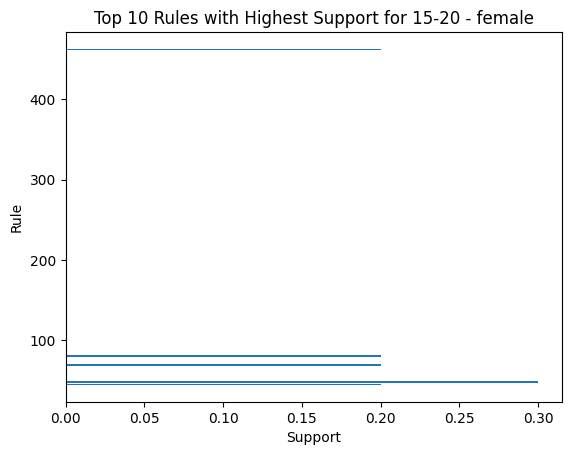

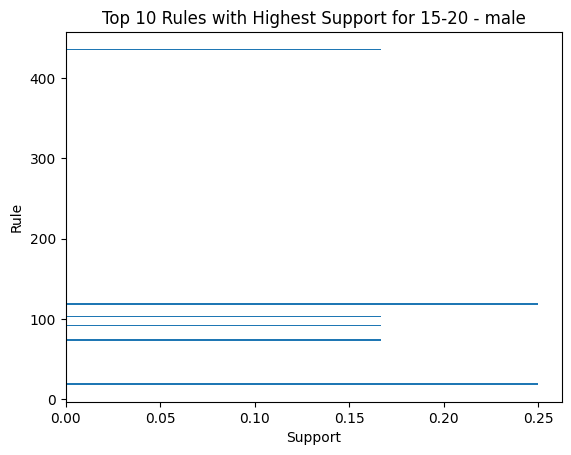

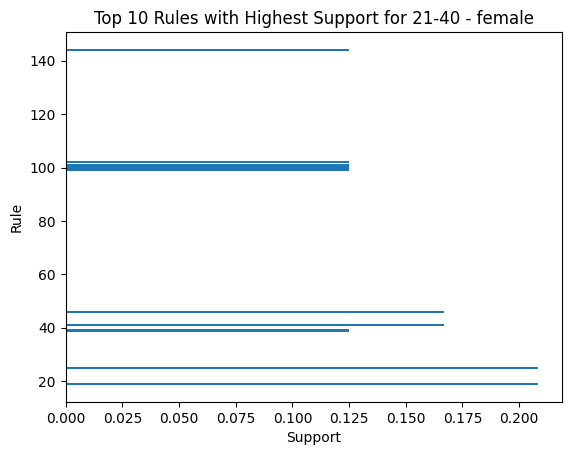

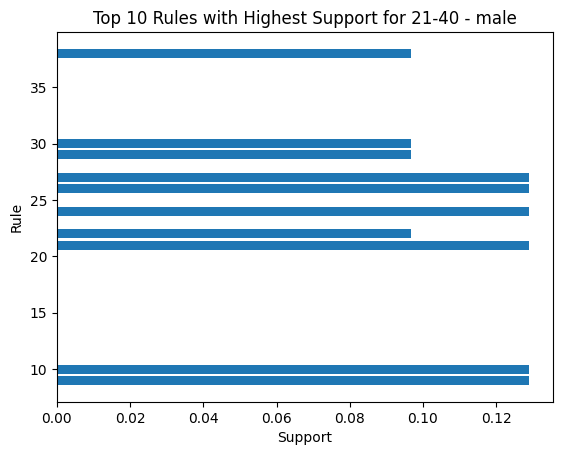

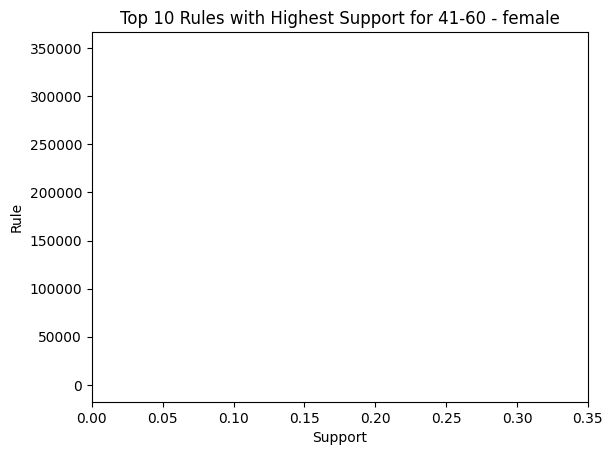

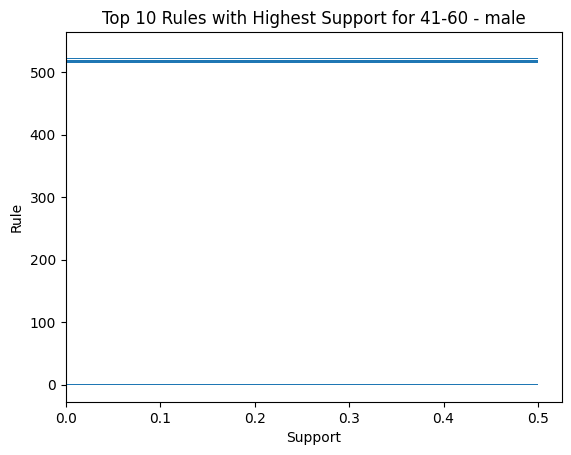

In [279]:
import matplotlib.pyplot as plt

# Iterate over the dictionary and create a bar chart for each age group and gender
for (age_group, gender), rules in age_gender_rules.items():
    # Get the top 10 rules with the highest support values
    top_10_rules = rules.sort_values(by='support', ascending=False).head(10)

    # Create a bar chart
    plt.barh(top_10_rules.index, top_10_rules['support'])
    plt.xlabel('Support')
    plt.ylabel('Rule')
    plt.title(f'Top 10 Rules with Highest Support for {age_group} - {gender}')
    plt.show()

In [339]:
rules.nlargest(10, 'support')
rules.nlargest(10, 'lift')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
18,( Saereesook),( Nap x Warin),0.5,0.5,0.5,1.0,2.0,0.25,inf
19,( Nap x Warin),( Saereesook),0.5,0.5,0.5,1.0,2.0,0.25,inf
20,( Nap x Warin),( SongSarn),0.5,0.5,0.5,1.0,2.0,0.25,inf
21,( SongSarn),( Nap x Warin),0.5,0.5,0.5,1.0,2.0,0.25,inf
22,( sangob),( Nap x Warin),0.5,0.5,0.5,1.0,2.0,0.25,inf
23,( Nap x Warin),( sangob),0.5,0.5,0.5,1.0,2.0,0.25,inf
24,(NAP's Coffee & Roasters),( Nap x Warin),0.5,0.5,0.5,1.0,2.0,0.25,inf
25,( Nap x Warin),(NAP's Coffee & Roasters),0.5,0.5,0.5,1.0,2.0,0.25,inf
26,( REDCOFFEE),( Phantae Coffee),0.5,0.5,0.5,1.0,2.0,0.25,inf
27,( Phantae Coffee),( REDCOFFEE),0.5,0.5,0.5,1.0,2.0,0.25,inf


In [275]:
rules.sort_values(by=['confidence'], ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( Nap x Warin),( Amarna),0.5,1.0,0.5,1.0,1.0,0.00,inf
487,"( REDCOFFEE, ROOF COFFEE)","(SongSarn, Phantae Coffee)",0.5,0.5,0.5,1.0,2.0,0.25,inf
513,"( Saereesook, sangob, Amarna, SongSarn)",( Nap x Warin),0.5,0.5,0.5,1.0,2.0,0.25,inf
514,"( Saereesook, Nap x Warin, Amarna, SongSarn)",( sangob),0.5,0.5,0.5,1.0,2.0,0.25,inf
515,"( sangob, Nap x Warin, SongSarn)","( Saereesook, Amarna)",0.5,0.5,0.5,1.0,2.0,0.25,inf


In [276]:
df_rulessss = pd.DataFrame.from_dict(age_gender_rules, orient='index')


C:\Users\Note\miniconda3\envs\recommendations\lib\site-packages\pandas\core\internals\construction.py:568: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


# test post method

In [306]:
import requests
import json

In [308]:
a = {
    "name":"Tong",
    "token":"asldkfjasl;dkfjas;ld",
    "age":32,
    "gender":"famale",
    "fav": [
        "Nap X warin",
        "Nap X Roaster",
        "Seeresok"
    ]
}

In [317]:
adduser = requests.post('http://127.0.0.1:5000/add',data = json.dumps({
    "name":"mind",
    "token":"as;ldkfjasd",
    "age":32,
    "gender":"famale",
    "fav": [
        "Nap X warin",
        "Nap X Roaster",
        "Seeresok"
    ]
}),headers={"Content-Type": "application/json"})
                       

print(adduser)

<Response [200]>
